In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
EnvironmentLoss = 4.2
measuredPower = -41 # For Thunderboard as a Static Beacon and the Starter Kit as a Sniffer device

def convertToDistance(inputRssiArray):
  return np.array([10**((measuredPower - rssi) / (10*EnvironmentLoss)) for rssi in inputRssiArray])

['./Results/50cm/0_Degree/B1.csv', './Results/50cm/90_Degree/B1.csv', './Results/50cm/180_Degree/B1.csv', './Results/50cm/270_Degree/B1.csv']
(20, 1)
(20, 1)


Text(0.5, 0.98, 'Distance: 50 cm -> 0 cm | Tag Orientation: [0, 90, 180, 270] Degrees')

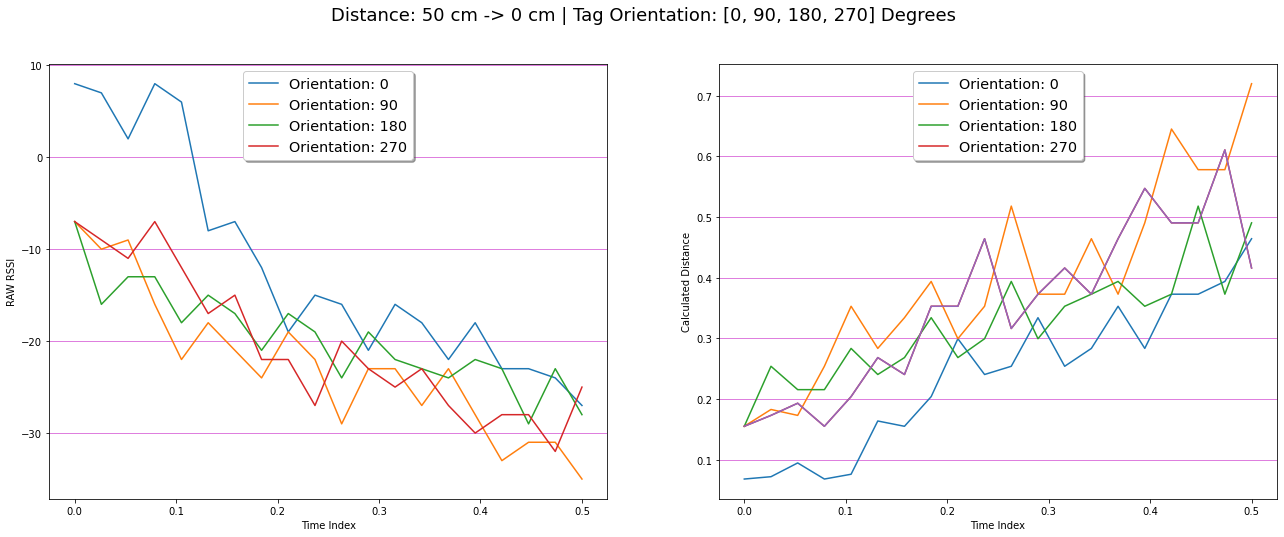

<Figure size 1440x360 with 0 Axes>

In [67]:
plt.rcParams["figure.figsize"] = (22, 8)

distance = 50
orientation = [0,90,180,270]

fileName1 = "./Results/{}cm/{}_Degree/B1.csv"

fileNameList = [fileName1.format(distance,orientation[i]) for i in range(4)]

print(fileNameList)

colorList = ['#FFBA49', '#20A39E', '#EF5B5B', '#0000FF']

# making data frame
rssiDataList = [pd.read_csv(fileNameList[i]) for i in range(len(fileNameList)) ]
distanceDataList = [pd.DataFrame(convertToDistance(rssiDataList[i].to_numpy()), columns=['Orientation: {}'.format(orientation[i])]) for i in range(len(fileNameList)) ]
fiftyToZero = pd.DataFrame(np.arange(.5, -0.025, -0.02631), columns=['Ideal Condition'])
a = pd.DataFrame(np.arange(.5, -0.025, -0.02631))

# define number of rows and columns for subplots
nrow = 1
ncol = 2
fig, ax = plt.subplots(1, 2)
axes = ax.flatten()
plt.figure(figsize=(20, 5))  # change the figure size as needed
print(np.shape(distanceDataList[1].values.tolist()))
print(np.shape(a.values.tolist()))
for i in range(len(fileNameList)):
  rssiDataList[i].rename(columns={'# rssi': 'Orientation: {}'.format(orientation[i])}, inplace=True)
  axes[0].plot(a.values.tolist(), rssiDataList[i].values.tolist(),
               label='Orientation: {}'.format(orientation[i]))
  # rssiDataList[i].plot(ax=axes[0], xticks=[i for i in range(0, 20, 2)],
  #                      grid=True, title="RSSI PLOT", fontsize=16, color=colorList[i])
  axes[1].plot(a.values.tolist(), distanceDataList[i].values.tolist(),
               label='Orientation: {}'.format(orientation[i]))
  # distanceDataList[i].plot(ax=axes[1], ylim=(-0.5, (distance/100)+0.5), xticks=a,
  #                          grid=True, title="Calculated Distance PLOT", fontsize=16, color=colorList[i])
axes[1].plot(a.values.tolist(), distanceDataList[i].values.tolist())
# fiftyToZero.plot(ax=axes[1], ylim=(-0.5, (distance/100)+0.5), xticks=a,
#                  grid=True, title="Calculated Distance PLOT", fontsize=16, color='#000000')
legend = axes[0].legend(loc='upper center', shadow=True, fontsize='x-large')
legend = axes[1].legend(loc='upper center', shadow=True, fontsize='x-large')

axes[0].grid(which='both',axis='y', color='m', linestyle='-', linewidth=0.5)
axes[1].grid(which='both',axis='y', color='m', linestyle='-', linewidth=0.5)
axes[0].set_xlabel("Time Index")
axes[0].xaxis.grid(True, which="minor")
axes[0].set_ylabel("RAW RSSI")
axes[1].set_xlabel("Time Index")
axes[1].xaxis.grid(True, which="minor")
axes[1].yaxis.grid(True, which="minor")
axes[1].set_ylabel("Calculated Distance")

fig.suptitle('Distance: {} cm -> 0 cm | Tag Orientation: {} Degrees'.format(distance, orientation), fontsize=18)
# fig.savefig(fileName1[:-3] + ".png", transparent=False)

